# Overfitting

Let's look at doing some quick machine learning with scikit learn

## Grab Some Data

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

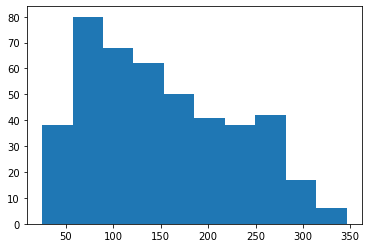

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
#rc('text', usetex=True)

print(dir(datasets))  # look at methods available
diabetes = datasets.load_diabetes()

print(diabetes.data.shape)
print(diabetes.target.shape)

plt.hist(diabetes.target)


training_data = diabetes.data[:300]
training_target = diabetes.target[:300]
testing_data = diabetes.data[300:]
testing_target = diabetes.target[300:]

## MLP

In [2]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import math

mlp = MLPRegressor(alpha=1e-6,
                   hidden_layer_sizes=(10,), random_state=1, max_iter=10000)

mlp.fit(training_data, training_target)

def RMSE(data, target, regressor):
    prediction = regressor.predict(data)
    return math.sqrt(np.mean((prediction-target)**2))


print("E_t = {:.3f},  E_g = {:.3f}".format(RMSE(training_data, training_target, mlp),
                                          RMSE(testing_data, testing_target, mlp)))

E_t = 54.150,  E_g = 53.189


## Normalise you data

In [3]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
sf = "{:.2g} "*10

print("means = ", sf.format(*np.mean(training_data,axis=0)))
print("vars  = ", sf.format(*np.var(training_data,axis=0)))

scaler.fit(training_data)
training_data = scaler.transform(training_data)  
# apply same transformation to test data
testing_data = scaler.transform(testing_data)

print("means = ", sf.format(*np.mean(training_data,axis=0)))
print("vars  = ", sf.format(*np.var(training_data,axis=0)))

mlp = MLPRegressor(alpha=1e-6,
                   hidden_layer_sizes=(10,), random_state=1, max_iter=10000)

mlp.fit(training_data, training_target)

print("E_t = {:.3f},  E_g = {:.3f}".format(RMSE(training_data, training_target, mlp),
                                          RMSE(testing_data, testing_target, mlp)))

means =  -0.0014 -0.00048 -0.002 -0.0014 -0.002 -0.0016 0.0021 -0.003 -0.0027 -0.0025 
vars  =  0.0024 0.0023 0.0022 0.0022 0.0022 0.0022 0.0024 0.0022 0.0021 0.0023 
means =  5.9e-18 -3e-18 8.1e-17 -3e-17 -7e-17 -9e-17 -8.9e-18 1.3e-16 1.1e-17 8.9e-19 
vars  =  1 1 1 1 1 1 1 1 1 1 
E_t = 46.675,  E_g = 56.339


## Test Overfitting

5 10 15 20 25 30 35 40 45 50 55 60 

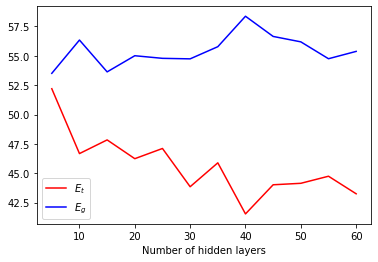

In [11]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import warnings

h = []
Et = []
Eg = []
for hidden in range(5,61,5):
    print(hidden, end=" ")
    mlp = MLPRegressor(alpha=0,
                       hidden_layer_sizes=(hidden,), random_state=1, max_iter=10000)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        mlp.fit(training_data, training_target)
    h.append(hidden)
    Et.append(RMSE(training_data, training_target, mlp))
    Eg.append(RMSE(testing_data, testing_target, mlp))
    

plt.plot(h, Et, "-r", label="$E_t$")
plt.plot(h, Eg, "-b", label="$E_g$")
plt.legend()
plt.xlabel("Number of hidden layers")
plt.show()